## Pairplots for data exploration are computationally expensive to plot visually on big datasets.

## This notebook will explain how to build a utility library to check linear correlation across all the variable in an extremely large dataset.

## The resulting output will be an heatmap instead of a classic pairplot/scatterplot and a dataframe containing the correlation for each pair of random variables

In [0]:
import math
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [0]:
#Generating artificial data for testing
import random

class DataGen:
  """
  Instantiates a datagenerating object.
  On construction it generates the random variable of a given lenght
  If specified, it generates a linear and a quadratic transformation of said
  variable
  """
  
  #Class attributes
  
  #Class constructor
  def __init__(self, n:int, length: int, dim: int):
    #Attributes
    self.n = n
    self.length = length
    self.dim = dim
    #Selfrunning methods
    self.datatype_check()
    self.X = self.generate()
    self.X_lin = self.generate_lin()
    self.X_quad = self.generate_quad()
    self.X_cube = self.generate_cube()

    
  def datatype_check(self):
    """
    Check if the class constructor is invoked correctly
    """
    if not((type(self.n) == type(1))):
      raise ValueError('Lenght must be an int. Error:', type(self.n))
      
    elif not((type(self.length) == type(1))):
      raise ValueError('Lenght must be an int. Error:', type(self.length))
    
    #Polynomial degree must be between 1 and 3
    elif (self.dim < 1 ) and (self.dim > 3):
      raise ValueError('Polynomial degree must be between 1 and 3', self.dim)
      
    print('DataType check correct: Constructor initialized')
    print(' ')
    
  def generate(self):
    """
    Generating random variable x of specified lenght with int between 1 and 100
    """
    print('Generating random variable X - Length:', self.length)
    self.X = []
    for i in range(0,self.length):
      i = random.randint(1,self.n)
      self.X.append(i)
    print('X: ', self.X[:10])
    print(' ')
    return self.X
  
  def generate_lin(self):
    if (self.dim >= 1):
      temp = random.randint(1,10)
      self.X_lin = [i * temp for i in self.X]
      print('Generating Linear Transformation - random', temp )
      print('X_lin: ', self.X_lin[:10])
      print(' ')
      return self.X_lin
    else:
      print('No linear transformation - X_lin is empty')
      print(' ')
      self.X_lin = []
      return self.X_lin

  def generate_quad(self):
    if (self.dim > 1):
      self.X_quad = [i**2 for i in self.X]
      print('Generating Quad Transformation')
      print('X_quad: ', self.X_quad[:10])
      print(' ')
      return self.X_quad
    else:
      print('No Quad transformation - X_quad is empty')
      self.X_quad = []
      return self.X_quad
    
  def generate_cube(self):
    if (self.dim == 3):
      self.X_cube = [i**3 for i in self.X]
      print('Generating Cubic Transformation')
      print('X_cube: ', self.X_cube[:10])
      print(' ')
      return self.X_cube
    else:
      print('No Cubic transformation - X_cube is empty')
      self.X_cube = []
      return self.X_cube

In [10]:
#Generating Artificial Data - 5 million rows
data = DataGen(100,5000000,3)

DataType check correct: Constructor initialized
 
Generating random variable X - Length: 5000000
X:  [41, 77, 89, 73, 20, 18, 72, 44, 55, 68]
 
Generating Linear Transformation - random 2
X_lin:  [82, 154, 178, 146, 40, 36, 144, 88, 110, 136]
 
Generating Quad Transformation
X_quad:  [1681, 5929, 7921, 5329, 400, 324, 5184, 1936, 3025, 4624]
 
Generating Cubic Transformation
X_cube:  [68921, 456533, 704969, 389017, 8000, 5832, 373248, 85184, 166375, 314432]
 


In [0]:
#Converting Data into a DataFrame
dataframe = {
    'A': data.X,
    'A_lin': data.X_lin,
    'A_quad': data.X_quad,
    'A_cube': data.X_cube
}
df1 = pd.DataFrame.from_dict(dataframe)

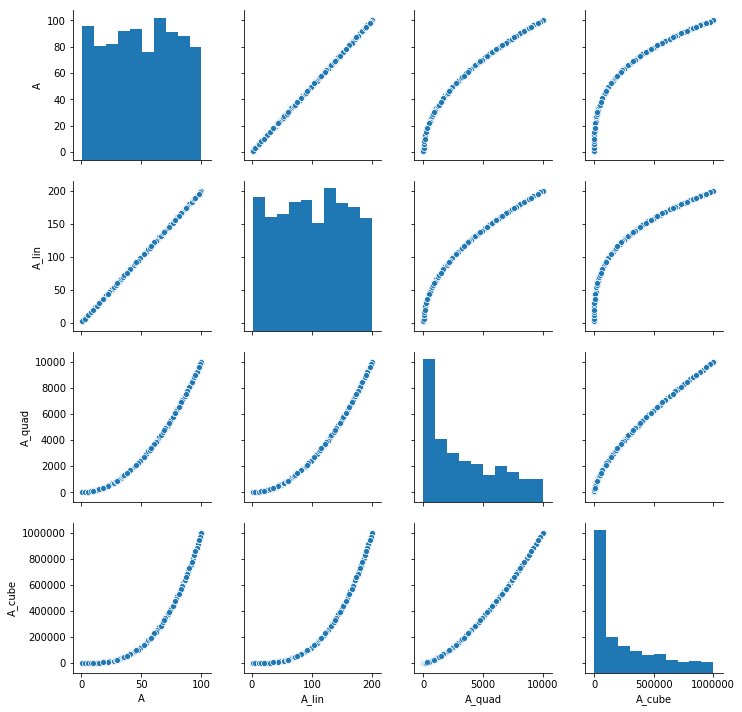

In [12]:
#Generating a pairplot of the first 1000 rows. Plotting 5000000 would take too long.
sns.pairplot(df1[:1000])

In [13]:
#Running classic OLS to check for linearity between A and A_lin
result = sm.ols(formula="A ~ A_lin", data=df1).fit()
print(result.summary())
print(result.params)
print("R-squared :", result.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.123e+35
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:50:05   Log-Likelihood:             1.4354e+08
No. Observations:             5000000   AIC:                        -2.871e+08
Df Residuals:                 4999998   BIC:                        -2.871e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.452e-14   7.44e-17    598.753      0.0

In [14]:
#Running classic OLS to check for linearity between A and A_quad
result = sm.ols(formula="A ~ A_quad", data=df1).fit()
print(result.summary())
print(result.params)
print("R-squared :", result.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 7.654e+07
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:50:08   Log-Likelihood:            -1.6929e+07
No. Observations:             5000000   AIC:                         3.386e+07
Df Residuals:                 4999998   BIC:                         3.386e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0608      0.005   3961.921      0.0

In [15]:
#Running classic OLS to check for linearity between A and A_cube
result = sm.ols(formula="A ~ A_cube", data=df1).fit()
print(result.summary())
print(result.params)
print("R-squared :", result.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.663e+07
Date:                Mon, 15 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:50:31   Log-Likelihood:            -1.9296e+07
No. Observations:             5000000   AIC:                         3.859e+07
Df Residuals:                 4999998   BIC:                         3.859e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.0453      0.007   3943.652      0.0

In [0]:
#Creating a function that would give information between the variables in a dataset using OLS.

In [17]:
result = sm.ols(formula="A ~ A_cube", data=df1).fit()
result.rsquared

0.8419235145049382

In [18]:
#Let's check how many variables are there in the dataframe
n = len(df1.columns)
#and store their names
variables = df1.columns
#Let's run a regression between each variable ( n choose k, combinatorial function. But k is always equal to 2)
def nCk(n):
    f = math.factorial
    return int(f(n) / f(2) / f(n-2))
#That's just a check, let's use
comb = [",".join(map(str, comb)) for comb in combinations(variables, 2)]
#And to be sure:
print(len(comb) == (nCk(n)))

True


In [19]:
#Let's run a linear regression for each distinct pair of random variables
res = []
for i in comb:
  temp1 = (i.split(',')[0])
  temp2 = (i.split(',')[1])
  frm = (temp1 + " ~ "+ temp2)
  print(frm)
  result = sm.ols(formula=frm, data=df1).fit()
  print(result.rsquared)
  res.append(result.rsquared)

A ~ A_lin
1.0
A ~ A_quad
0.938683310625673
A ~ A_cube
0.8419235145049382
A_lin ~ A_quad
0.938683310625673
A_lin ~ A_cube
0.8419235145049382
A_quad ~ A_cube
0.9723737714419105


In [0]:
#Converting the results into percentage points
res_int = []
for i in res:
  res_int.append(i*100)

In [0]:
#Defining a function that converts a list into a lower triangular numpy matrix 
#Credits to: https://stackoverflow.com/questions/51439271/convert-1d-array-to-lower-triangular-matrix

def fill_lower_diag(a):
    n = int(np.sqrt(len(a)*2))+1
    mask = np.tri(n,dtype=bool, k=-1) # or np.arange(n)[:,None] > np.arange(n)
    out = np.zeros((n,n),dtype=int)
    out[mask] = a
    return out

In [0]:
#Building the lower triangular matrix
lower = fill_lower_diag(res_int)
#Transposing it to create the upper triangular matrix counterpart and adding them together
full = lower + lower.T
#Filling the diagonal with perfect linear correlation score = 100%
np.fill_diagonal(full, 100)
#Assembling dataframe
output_dataframe = pd.DataFrame(data=full, columns=df1.columns, index=df1.columns)

In [23]:
#Result
output_dataframe

,A,A_lin,A_quad,A_cube
A,100,100,93,93
A_lin,100,100,84,84
A_quad,93,84,100,97
A_cube,93,84,97,100


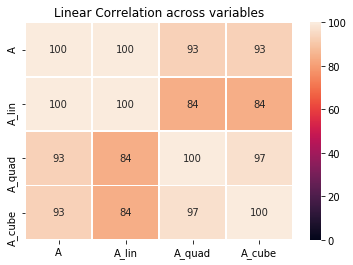

In [24]:
#Converting the results to an heatmap
ax = plt.axes()
sns.heatmap(output_dataframe, vmin=0, vmax=100, annot=True, fmt="d", linewidths=.5)
ax.set_title('Linear Correlation across variables')
None